In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary_data=pd.read_csv("//Users//sreeramkn//Downloads//Salary_Data.csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### 1.Initial investigation

In [3]:
salary_data.shape

(30, 2)

In [4]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

Inference

1)The shape of the data set is (30,2)

2)There is no null value and data types are assigned correctly

3)There is no need to do data cleaning process

### 2.Assumptions check

In [6]:
x=salary_data['YearsExperience']
y=salary_data['Salary']

In [7]:
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'salary')

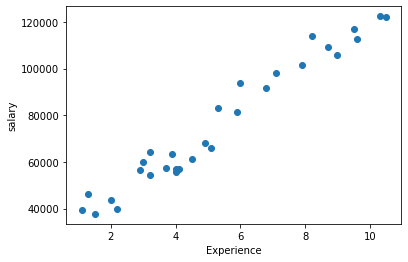

In [8]:
plt.scatter(x,y)
plt.xlabel('Experience')
plt.ylabel('salary')

In [9]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

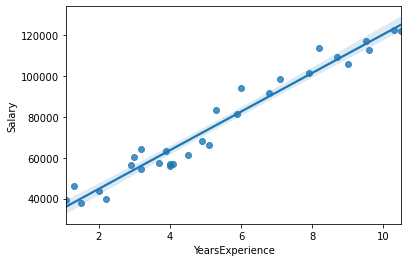

In [10]:
sns.regplot(x,y)

<AxesSubplot:ylabel='Density'>

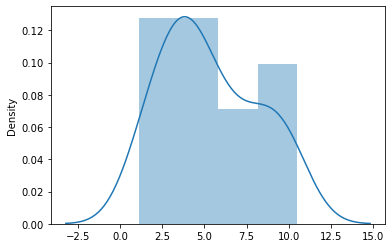

In [11]:
sns.distplot(x=salary_data['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

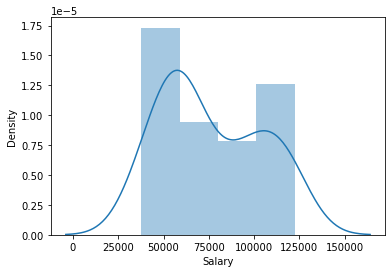

In [12]:
sns.distplot(salary_data['Salary'])

Inference

1)From the above plots its is clear that the input and output data are almost linear and positively correlated.

2)From the correlation table, it is clear that the strength of correlation is good.

3)since, there is only one input,multicollinearity doesn't occur.

Hence we can use built linear regression model

### 3.Model training

In [13]:
import statsmodels.formula.api as smf

In [14]:
model=smf.ols('Salary~YearsExperience',data=salary_data).fit()
model

In [15]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

1)The value of slope is 1.649

2)The value of intercept is 6.5827

### 4.Model testing

In [16]:
y_pred=model.predict(x)

### 5.Model evaluation

In [17]:
from sklearn.metrics import mean_squared_error,r2_score

print('Mean square error is: ',mean_squared_error(y,y_pred))
print('R2 score is: ',r2_score(y,y_pred))

Mean square error is:  31270951.722280968
R2 score is:  0.9569566641435086


Inference

Since, the r2 score is close to 1, the model will comparitively perform well.